# Homework assignment 3: revising the EER and Relational model

## 1: Reflecting on the EER diagram

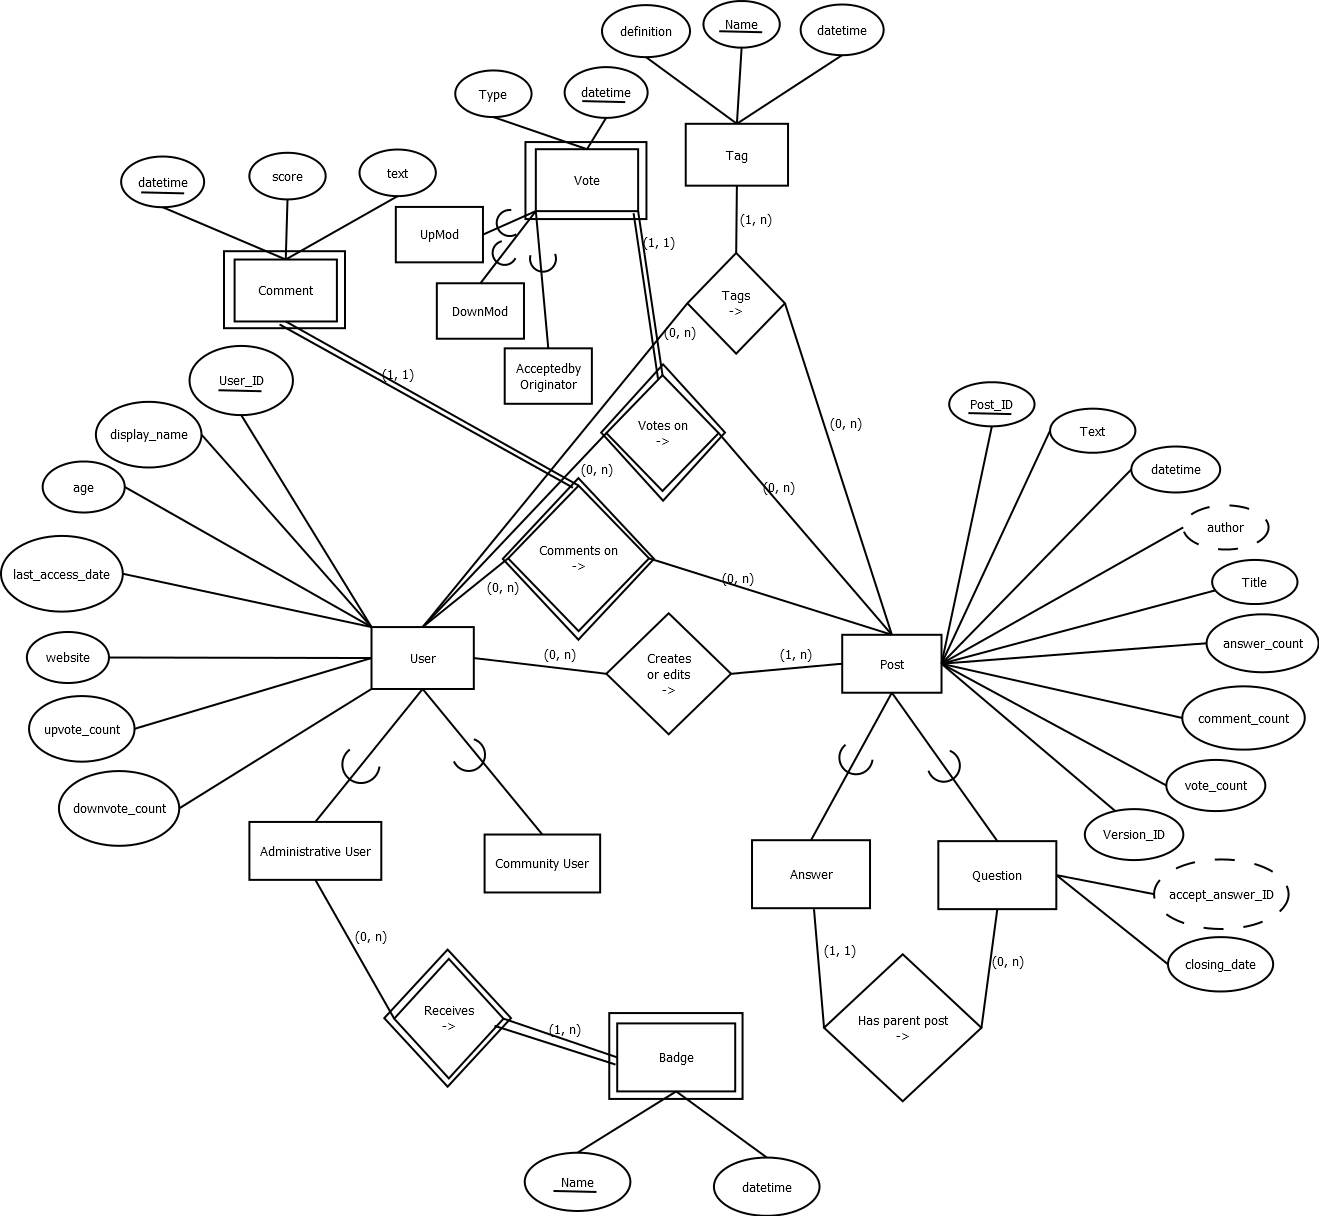

In [1]:
from IPython.display import Image
Image(filename="hw1.png")

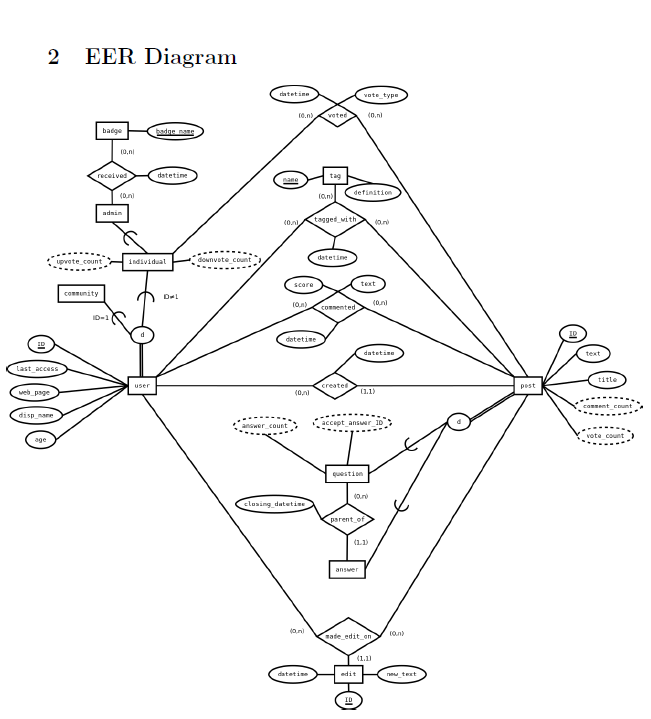

In [2]:
Image(filename="hw1solution.png")

### 1.1 The 'comment' vs the 'made_edit_on' relationship

One of the big differences of my EER diagram and the solution diagram can be found in the way edits are made. I've included making edits in the same relationship as creating a post. More about that choice later. Let's first look at how made_edit_on is done in the solution diagram. It's a multiway tertiary relationship between the entities use, post and edit. You could describe it as a one-to-many-to-many relationship. Let's break that down:
- Many users can edit a post
- Many posts can be edited by the same user
- A user always creates one specific edit on a post

Let's compare this to how commenting works. The comment relationship is a binary many-to-many relationship between user and post. It doesn't store comments in a separate 'comment' entity with a unique ID. This becomes clear if you look at the ER diagram below. This is the biggest difference between both relationships. They both have some separate attributes. For the made_edit_on relationship, these attributes are added to the 'edit' entity. For the 'commented' relationship, the attributes are added to the relationship itself. 

So why make these two relationships so different? They're both pieces of texts that a user writes and stands in relation to a post. Ofcourse the difference lies in the way that edits and comments work. A comment is, by nature, something that is <b>appended</b> to a post. It does not change the post itself, and is simply a piece of text made by a user on a post. It only exists in relation between the user and the post. If the post is deleted, the comment doesn't exist anymore, since the post_id would disappear. if the user decides to delete the comment, this doesn't affect the post. 

What about an edit then? It is different in the crucial factor that it doesn't append, but <b>change</b> the text of a post. If a post is edited, the new text replaces the old one. This wouldn't be a problem in itself, except that you need to think about the importance of <b>keeping the original posts and other edits</b> as well, because they are part of the <b>version history</b> of the post. 

### 1.2. Some more reflections on the EER diagram:

In my EER model I had a different approach to a few things.

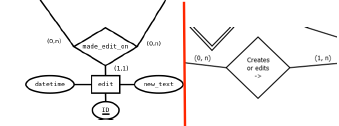

In [5]:
Image(filename="editpostscomparison.png")

<b> Editing posts </b>

(on the left the model solution, on the right my solution)

I took the straightforward approach of embedding the 'edit' relationship in the 'create post' relationship. In my thinking, editing a post was exactly the same as creating one. The only thing you did was simply overwrite the original post with a new text and the same post_ID, right? This approach has a lot of caveats. Looking at the version history becomes impossible, because you overwrite the old post every time you edit it, without saving it somewhere else. The solution model takes care of this by creating a separate tabel for edits. Overwriting the old post also means the original author disappears and the editor takes its place, without anyone knowing who the original author was. Actually, you simply overwrite everything, making a new post with the same post_ID but without a way of knowing what the original post was, who posted it, when, etc. The solution's model is clearly superior here. 

<b> Commenting and Voting </b>

In my EER model, I approached commenting and voting the same way. I made them Weak Entity Sets referring to weak multiway ternary relationship between User, Comment/Vote, and Post. This was close to the solution, but the solution diagram made it more elegant by doing away with the Weak Entity Sets and simply adding the attributes directly onto the relationships. There isn't really a need for a separate entity set vor Comment and Vote anyway, since those two only exist as an addition to the post, and don't need to stand on their own. The solution is more elegant here.

<b> datetimes</b>

The solution diagram has always appended the datetime attribute to relations, never to individual entity sets. I do agree that this makes the most sense, since the datetime always refers to a point in time in which the entity sets have taken part in a specific relation. However, for some relationships this specification matters less. In a one-to-many relationship I would think that it's just as right to append the datetime attribute to the entity set that stands on the one-side of the one-to-many relationship, since in the relational diagram these attributes will be added to the tables of the one-side of the relationship anyway. In many-to-many relationships it's more important to add the datetime attribute to the relationship itself, because the datetime attribute belongs in the separate table that will be made for this relationship. For instance, in the 'Answer is Parent of Question' relationship, the datetime attribute could be appended to answer or to the Parent Of relationship. Both would be correct in the sense that they wouldn't change the layout of the relational diagram. But appending datetime to the relationship makes more sense from a theoretical point of view, since it clearly shows that this column registers the datetime at which the two entities take part in a relationship. 

<b> Subclasses for votes</b>

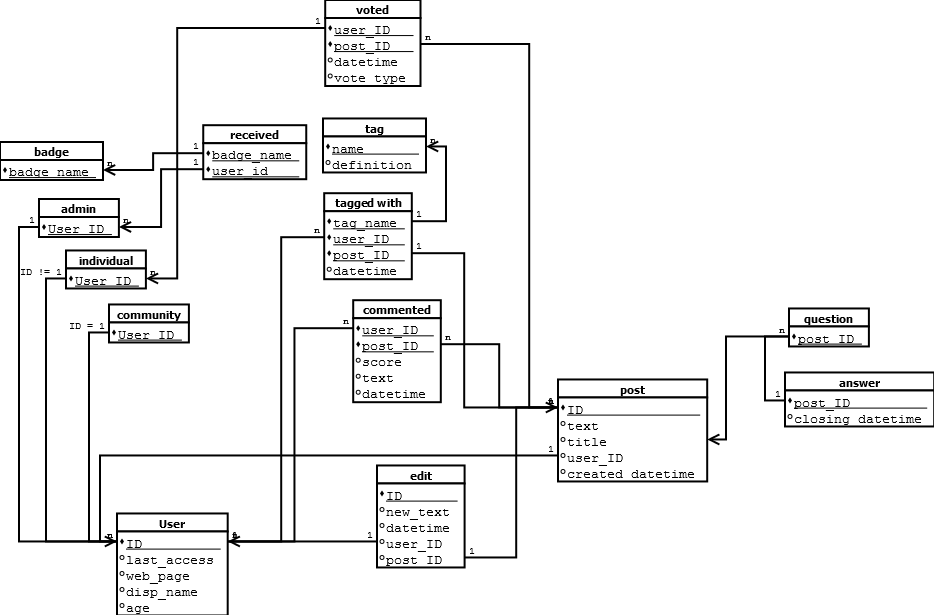

In [3]:
Image(filename="hw2.png")

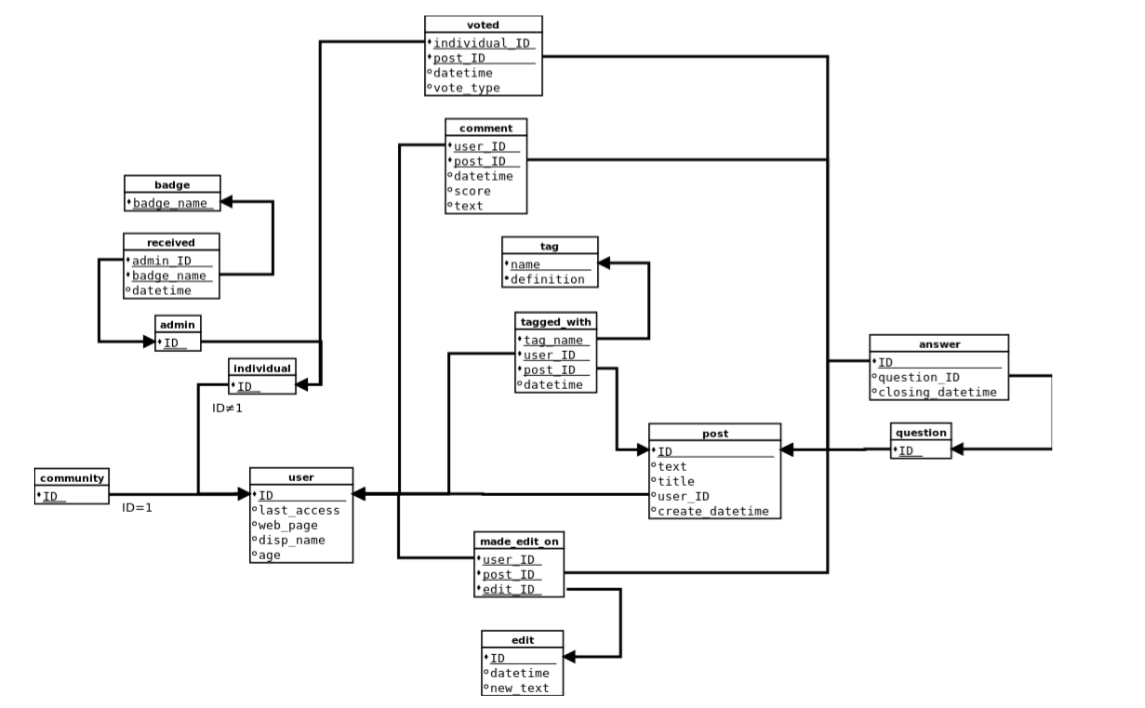

In [4]:
Image(filename="hw2solution.png")

## 2. Reflections on the Relational Diagram

<b> Admins and individuals </b>